In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, \
    precision_score, recall_score, accuracy_score

from math import sqrt

import seaborn as sns

import matplotlib.pyplot as plt

from rdkit import Chem

In [2]:
results = pd.read_csv('predictions_all.csv', usecols=[1,2,3,4,5,6])
results['real_side'] = results['real_top'].apply(lambda m: 1 if m>50 else 0)
results['predicted_side'] = results['predicted_top'].apply(lambda m: 1 if m>50 else 0)
results

,Error,Index,Fold,Method,real_top,predicted_top,real_side,predicted_side
0,0.978670,9,1,GNN,2.25,1.271330,0,0
1,-11.287350,15,1,GNN,15.00,26.287350,0,0
2,0.104437,27,1,GNN,1.00,0.895563,0,0
3,0.805049,31,1,GNN,1.75,0.944951,0,0
4,8.804134,37,1,GNN,11.00,2.195866,0,0
...,...,...,...,...,...,...,...,...
12343,0.268919,659,10,Atomistic Potential,98.00,97.731081,1,1
12344,0.532815,670,10,Atomistic Potential,97.50,96.967185,1,1
12345,-1.792654,673,10,Atomistic Potential,96.50,98.292654,1,1
12346,1.988727,683,10,Atomistic Potential,98.00,96.011273,1,1


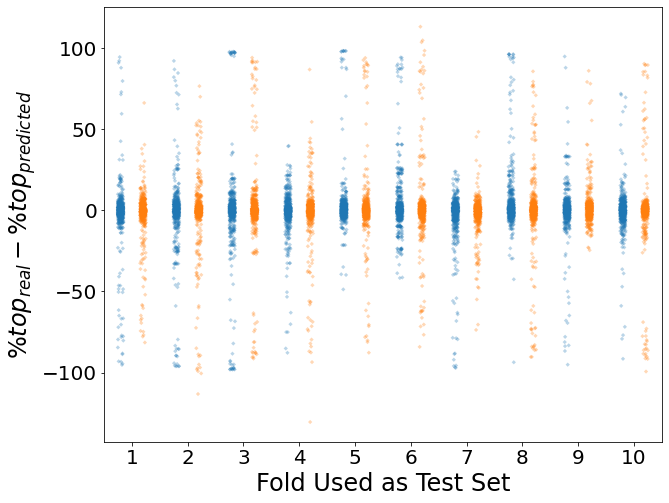

In [3]:
plt.figure(figsize=(10,8))


#sns.catplot(data=results, x="Fold", y="Error", hue="Method", kind="violin", color=".9", inner=None)

sns.stripplot(
    data=results, x="Fold", y="Error", hue="Method", size=3, dodge=True, jitter=True, marker='D', alpha=.3)

#plt.xticks(range(1, 11), range(1, 11))


plt.xlabel('Fold Used as Test Set', fontsize=24)
plt.ylabel('$\%top_{real}-\%top_{predicted}$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax= plt.gca()
ax.get_legend().remove()

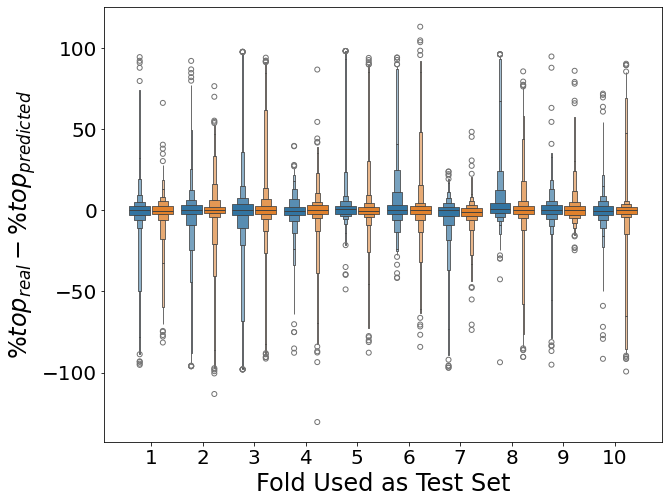

In [4]:
plt.figure(figsize=(10,8))

sns.boxenplot(
    data=results, x="Fold", y="Error", hue="Method",
    native_scale=True, zorder=1, gap = .1, width=.9
)

plt.xticks(range(1, 11), range(1, 11))


plt.xlabel('Fold Used as Test Set', fontsize=24)
plt.ylabel('$\%top_{real}-\%top_{predicted}$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax= plt.gca()
ax.get_legend().remove()

In [5]:
results_gnn = results.loc[results['Method'] == 'GNN']
results_TML = results.loc[results['Method'] == 'Atomistic Potential']

In [6]:
precision_gnn = precision_score(y_true=results_gnn['real_side'], y_pred=results_gnn['predicted_side'])
recall_gnn = recall_score(y_true=results_gnn['real_side'], y_pred=results_gnn['predicted_side'])
accuracy_gnn = accuracy_score(y_true=results_gnn['real_side'], y_pred=results_gnn['predicted_side'])

print('Precision score all datapoints GNN {}'.format(precision_gnn))
print('Recall score all datapoints GNN {}'.format(recall_gnn))
print('Accuracy score all datapoints GNN {}'.format(accuracy_gnn))

Precision score all datapoints GNN 0.962532299741602
Recall score all datapoints GNN 0.9653385163589245
Accuracy score all datapoints GNN 0.9638807904114026


In [7]:
mae_gnn = mean_absolute_error(y_true=results_gnn['real_top'], y_pred=results_gnn['predicted_top'])
rmse_gnn = sqrt(mean_squared_error(y_true=results_gnn['real_top'], y_pred=results_gnn['predicted_top']))
r2_gnn = r2_score(y_true=results_gnn['real_top'], y_pred=results_gnn['predicted_top'])

print('Mean absolute error all datapoints GNN {}'.format(mae_gnn))
print('Root mean squared error  all datapoints GNN {}'.format(rmse_gnn))
print('R2 score all datapoints GNN {}'.format(r2_gnn))

Mean absolute error all datapoints GNN 7.627410780607264
Root mean squared error  all datapoints GNN 17.409887111273942
R2 score all datapoints GNN 0.8519719214058231


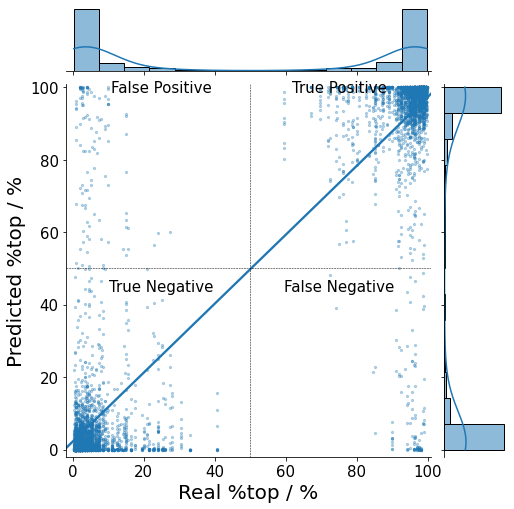

In [8]:
g = sns.jointplot(x="real_top", y="predicted_top", data=results_gnn,
                  kind="reg", truncate=False,
                  xlim=(-2, 101), ylim=(-2, 101),
                  color="#1f77b4", height=7,
                  scatter_kws={"s": 5, "alpha": 0.3})



plt.axvline(x=50, color='black', linestyle='--', linewidth=.5)

# add horizontal line at y=50
plt.axhline(y=50, color='black', linestyle='--', linewidth=.5)


# plot your data here
'''plt.text(x=25, y=80, s=f"$R^2$ = {r2_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=75, s=f"MAE = {mae_gnn:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=70, s=f"RMSE = {rmse_gnn:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')

plt.text(x=75, y=20, s=f"Accuracy = {accuracy_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=15, s=f"Recall = {recall_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=10, s=f"Precision = {precision_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')'''

plt.text(x=25, y=100, s=f"False Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')
plt.text(x=75, y=100, s=f"True Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

plt.text(x=25, y=45, s=f"True Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')
plt.text(x=75, y=45, s=f"False Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')


g.ax_joint.xaxis.label.set_size(20)
g.ax_joint.yaxis.label.set_size(20)

g.ax_joint.set_xlabel('Real %top / %')
g.ax_joint.set_ylabel('Predicted %top / %')

g.ax_joint.tick_params(axis='both', which='major', labelsize=15)

In [9]:
precision_tml = precision_score(y_true=results_TML['real_side'], y_pred=results_TML['predicted_side'])
recall_tml = recall_score(y_true=results_TML['real_side'], y_pred=results_TML['predicted_side'])
accuracy_tml = accuracy_score(y_true=results_TML['real_side'], y_pred=results_TML['predicted_side'])

print('Precision score all datapoints TML {}'.format(precision_tml))
print('Recall score all datapoints TML {}'.format(recall_tml))
print('Accuracy score all datapoints TML {}'.format(accuracy_tml))

Precision score all datapoints TML 0.9541935483870968
Recall score all datapoints TML 0.9582118561710399
Accuracy score all datapoints TML 0.9561062520246194


In [10]:
mae_tml = mean_absolute_error(y_true=results_TML['real_top'], y_pred=results_TML['predicted_top'])
rmse_tml = sqrt(mean_squared_error(y_true=results_TML['real_top'], y_pred=results_TML['predicted_top']))
r2_tml = r2_score(y_true=results_TML['real_top'], y_pred=results_TML['predicted_top'])

print('Mean absolute error all datapoints TML {}'.format(mae_tml))
print('Root mean squared error  all datapoints TML {}'.format(rmse_tml))
print('R2 score all datapoints TML {}'.format(r2_tml))

Mean absolute error all datapoints TML 7.272555016030293
Root mean squared error  all datapoints TML 17.39287828046068
R2 score all datapoints TML 0.8522610164405802


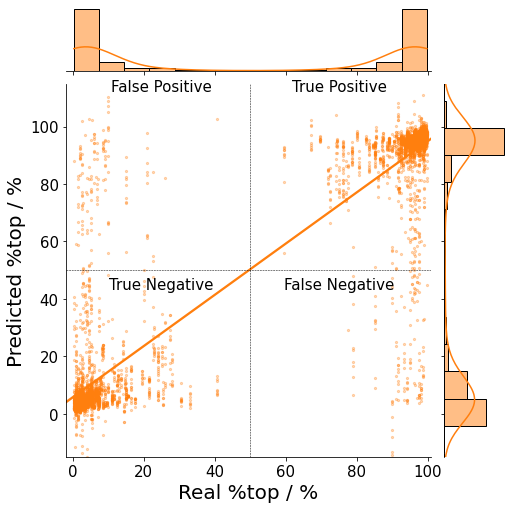

In [11]:
g = sns.jointplot(x="real_top", y="predicted_top", data=results_TML,
                  kind="reg", truncate=False,
                  xlim=(-2, 101), ylim=(-15, 115),
                  color="#ff7f0e", height=7,
                  scatter_kws={"s": 5, "alpha": 0.3})



plt.axvline(x=50, color='black', linestyle='--', linewidth=.5)
# add horizontal line at y=50
plt.axhline(y=50, color='black', linestyle='--', linewidth=.5)


# plot your data here
'''plt.text(x=25, y=80, s=f"$R^2$ = {r2_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=75, s=f"MAE = {mae_tml:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=70, s=f"RMSE = {rmse_tml:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')

plt.text(x=75, y=20, s=f"Accuracy = {accuracy_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=15, s=f"Recall = {recall_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=10, s=f"Precision = {precision_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')'''

plt.text(x=25, y=114, s=f"False Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')
plt.text(x=75, y=114, s=f"True Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

plt.text(x=25, y=45, s=f"True Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

plt.text(x=75, y=45, s=f"False Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

g.ax_joint.xaxis.label.set_size(20)
g.ax_joint.yaxis.label.set_size(20)

g.ax_joint.set_xlabel('Real %top / %')
g.ax_joint.set_ylabel('Predicted %top / %')

g.ax_joint.tick_params(axis='both', which='major', labelsize=15)

In [12]:
errors_gnn = results_gnn.loc[results_gnn['Error'] >50, 'Index'].value_counts()
errors_TML = results_TML.loc[results_TML['Error'] >50, 'Index'].value_counts()

In [13]:
common_GNN = errors_gnn[errors_gnn.index.isin(errors_TML.index)]
common_GNN

263    9
308    9
307    9
309    9
320    9
648    5
246    3
110    3
572    2
289    1
Name: Index, dtype: int64

In [14]:
common_TML = errors_TML[errors_TML.index.isin(errors_gnn.index)]
common_TML

263    9
307    9
320    9
246    8
572    6
309    6
289    4
308    2
110    1
648    1
Name: Index, dtype: int64

In [15]:
not_common_GNN = errors_gnn[~errors_gnn.index.isin(errors_TML.index)]
not_common_GNN

250    8
595    7
90     6
596    6
249    3
248    3
113    3
256    2
116    2
111    1
112    1
114    1
510    1
Name: Index, dtype: int64

In [16]:
not_common_TML = errors_TML[~errors_TML.index.isin(errors_gnn.index)]
not_common_TML

262    9
7      9
402    9
662    8
2      6
4      5
553    4
550    3
6      2
567    1
555    1
590    1
635    1
Name: Index, dtype: int64